In [1]:
% !pip install --upgrade geopandas

import geopandas as gpd

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.1/1.1 MB 8.3 MB/s eta 0:00:00
     --------------------------------------- 22.0/22.0 MB 19.8 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 23.8 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 21.9 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import fiona

In [4]:
## data from https://www.globio.info/download-grip-dataset
## Turkey is in Region 4 in the dataset
roadmap = gpd.read_file("./GRIP4_region4.shp")

In [5]:
roadmap.describe()

,GP_RTP,GP_REX,GP_RAV,GP_RRG,GP_RCY,GP_RSE,GP_RSI,GP_RSY,gp_gripreg,Shape_Leng
count,8.786966e+06,8.786966e+06,8.786966e+06,8.786966e+06,8.786966e+06,8.786966e+06,8.786966e+06,8.786966e+06,8786966.0,8.786966e+06
mean,4.607495e+00,8.976840e-01,1.951743e+00,1.130575e+01,4.773317e+02,9.769538e-01,5.398390e+01,2.011344e+03,4.0,5.103898e-03
std,9.345961e-01,3.030634e-01,2.718736e-01,6.323138e-01,2.527353e+02,4.273331e-01,3.149211e-01,5.496246e+00,0.0,2.406428e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.0,2.549507e-08
25%,5.000000e+00,1.000000e+00,2.000000e+00,1.100000e+01,2.760000e+02,1.000000e+00,5.400000e+01,2.011000e+03,4.0,7.352899e-04
50%,5.000000e+00,1.000000e+00,2.000000e+00,1.100000e+01,3.800000e+02,1.000000e+00,5.400000e+01,2.011000e+03,4.0,1.490855e-03
75%,5.000000e+00,1.000000e+00,2.000000e+00,1.100000e+01,7.240000e+02,1.000000e+00,5.400000e+01,2.011000e+03,4.0,3.247235e-03
max,5.000000e+00,1.000000e+00,2.000000e+00,1.300000e+01,8.910000e+02,3.000000e+00,5.400000e+01,2.015000e+03,4.0,5.067022e+00


In [6]:
turkey= roadmap[roadmap['GP_RRG']==13]
turkey.describe()

,GP_RTP,GP_REX,GP_RAV,GP_RRG,GP_RCY,GP_RSE,GP_RSI,GP_RSY,gp_gripreg,Shape_Leng
count,824014.000000,824014.000000,824014.0,824014.0,824014.000000,824014.000000,824014.0,824014.000000,824014.0,824014.000000
mean,4.640930,0.019426,2.0,13.0,772.875887,0.360650,54.0,2014.980574,4.0,0.005740
std,0.788828,0.138016,0.0,0.0,115.551815,0.713155,0.0,0.138016,0.0,0.014794
min,1.000000,0.000000,2.0,13.0,51.000000,0.000000,54.0,2014.000000,4.0,0.000004
25%,5.000000,0.000000,2.0,13.0,792.000000,0.000000,54.0,2015.000000,4.0,0.000913
50%,5.000000,0.000000,2.0,13.0,792.000000,0.000000,54.0,2015.000000,4.0,0.001767
75%,5.000000,0.000000,2.0,13.0,792.000000,0.000000,54.0,2015.000000,4.0,0.003896
max,5.000000,1.000000,2.0,13.0,792.000000,3.000000,54.0,2015.000000,4.0,0.854269


In [ ]:
# roadmap.to_file('turkey.shp')

In [15]:
roadmap.head()

,GP_RTP,GP_REX,GP_RAV,GP_RRG,GP_RCY,GP_RSE,GP_RSI,GP_RSY,gp_gripreg,Shape_Leng,geometry
0,5,1,1,11,764,3,54,2011,4,0.002238,"LINESTRING (101.00133 5.70721, 101.00078 5.707..."
1,5,1,1,11,764,3,54,2011,4,0.004193,"LINESTRING (101.06679 5.77227, 101.06722 5.773..."
2,5,1,1,11,764,3,54,2011,4,0.006943,"LINESTRING (101.75146 5.80132, 101.75121 5.801..."
3,5,1,1,11,764,3,54,2011,4,0.001739,"LINESTRING (101.23298 5.85602, 101.23287 5.856..."
4,5,1,1,11,764,3,54,2011,4,0.004818,"LINESTRING (101.23519 5.85662, 101.23566 5.856..."


In [11]:
import matplotlib.pyplot as plt

<AxesSubplot:>

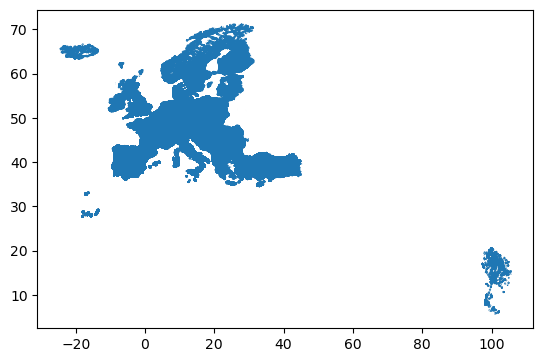

In [16]:
## Plot the whole Europe out
roadmap.plot()

<AxesSubplot:>

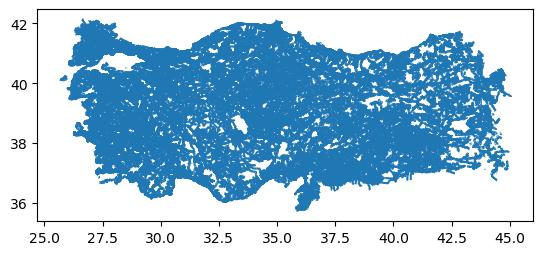

In [17]:
## Plot Turkey part
turkey.plot()

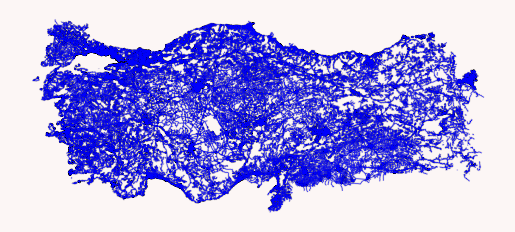

In [19]:
## Plot the geometry of Turkey
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
#fig.set_size_inches(5, 7)

turkey.plot(ax=ax, color='black', alpha=0.1)
turkey['geometry'].plot(ax=ax, color='blue', lw=0.4, alpha=1)

ax.axis('off')

plt.show()